## Списки

Вам дан список. Поменяйте местами первую и вторую половину списка.

In [6]:
list = [1, 2, 3, 4, 5, 6]

half = len(list) // 2

new_list = list[half:] + list[:half]
new_list

[4, 5, 6, 1, 2, 3]


Вам дан список. Поменяйте в нём местами блоки элементов: каждый нечётный со первого по пятый с начала с каждым чётный со второго по пятый с конца. 

In [365]:
list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
odd_list = list[:5:2]

if len(list) % 2 ==0:
    even_list = list[:-6:-2]
    list[:-6:-2] = odd_list
else:
    even_list = list[-2:-8:-2]
    list[-2:-8:-2] = odd_list

list[:5:2] = even_list

list

[14, 2, 12, 4, 10, 6, 7, 8, 9, 5, 11, 3, 13, 1]

## Генераторы

Вам дан список. Создайте новый список, в котором останутся только чётные элементы кратные трём. 

In [279]:
list = [1, 3, 6, 8, 12, 9, 7, 11]

new_list = [x for x in list if x % 6 == 0]
new_list

[6, 12]

Вам дан список. Для него и ивертированного по порядку списка выведите пары (x, y) в новом списке.

In [44]:
list = [1, 2, 3, 4, 5]
inv_list = list[::-1]

new_list = [(x, y) for x, y in zip(list, inv_list)]
new_list

[(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)]

## Встроенные функции

Вам дана строка. Выведите сумму ascii-кодов элементов в строке. 

In [46]:
str = "hello world"

ascii_sum = sum(ord(char) for char in str)
ascii_sum

1116

Вам дана строка. Выведите строку, выведите пары (элемент строки, порядковый номер).

In [48]:
str = "hello world"

for i, char in enumerate(str):
    print(char, i)

h 0
e 1
l 2
l 3
o 4
  5
w 6
o 7
r 8
l 9
d 10


## NumPy

In [51]:
import numpy as np

Дан массив 16х16
Создайте новый массив 4х4 , элементы которого будут суммой блоков 4х4 исходного массива

In [354]:
arr = np.random.randint(0, 10, (16, 16))

arr.reshape(4, 4, 4, 4).sum(axis=(1, 3))

array([[75, 66, 43, 88],
       [86, 63, 77, 61],
       [65, 79, 70, 66],
       [71, 58, 85, 70]])

Дан массив, вставьте между каждым значением сумму соседних элементов

In [284]:
arr = np.random.randint(0, 10, 8)

print(arr)
elementwise_sum = arr[:-1] + arr[1:]
result = np.empty(arr.size + elementwise_sum.size, dtype=arr.dtype)

result[0::2] = arr
result[1:: 2] = elementwise_sum
print(result)

[6 7 5 6 3 1 1 0]
[ 6 13  7 12  5 11  6  9  3  4  1  2  1  1  0]


## Pandas

https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте график распределения переменной `actual_productivity`.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных категорий в колонке `quarter` *(т.е. отдельно какие показатели у класса quarter1, какие у класса quarter2 и и т.д.)*.
- Разделите колонку `date` на три: день, месяц, год.

In [243]:
import pandas as pd

data = pd.read_csv(r"C:\Users\ПК\Downloads\garments_worker_productivity.csv")

data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Типы данных

In [100]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

# Пропущенные значения

In [119]:
data.isnull().any(axis=0) 

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
dtype: bool

In [126]:
data[data.isnull().any(axis=1)]["wip"].size

506

# График распределения

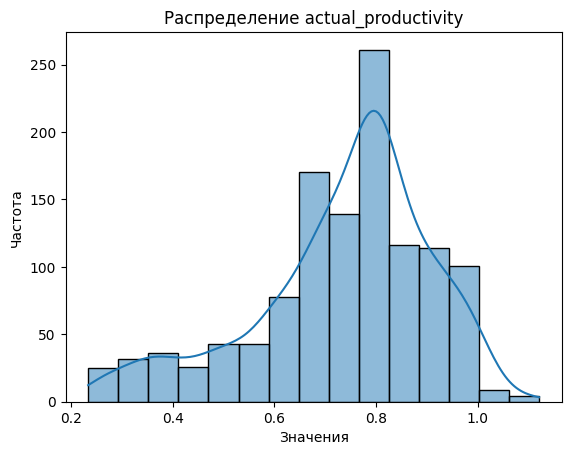

In [135]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(data["actual_productivity"], bins=15, kde=True)
plt.title('Распределение actual_productivity')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

# Хитмапа корелляции

<Axes: >

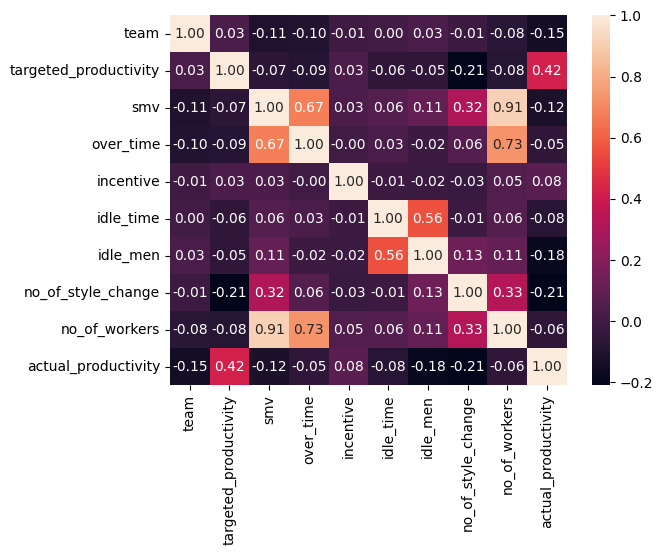

In [168]:
num_columns = [column for column in data.columns if data[column].dtype in ["int64", "float64"] and column != "wip"]

sns.heatmap(data[num_columns].corr(), annot=True, fmt=".2f")

# Pairplot всех переменных

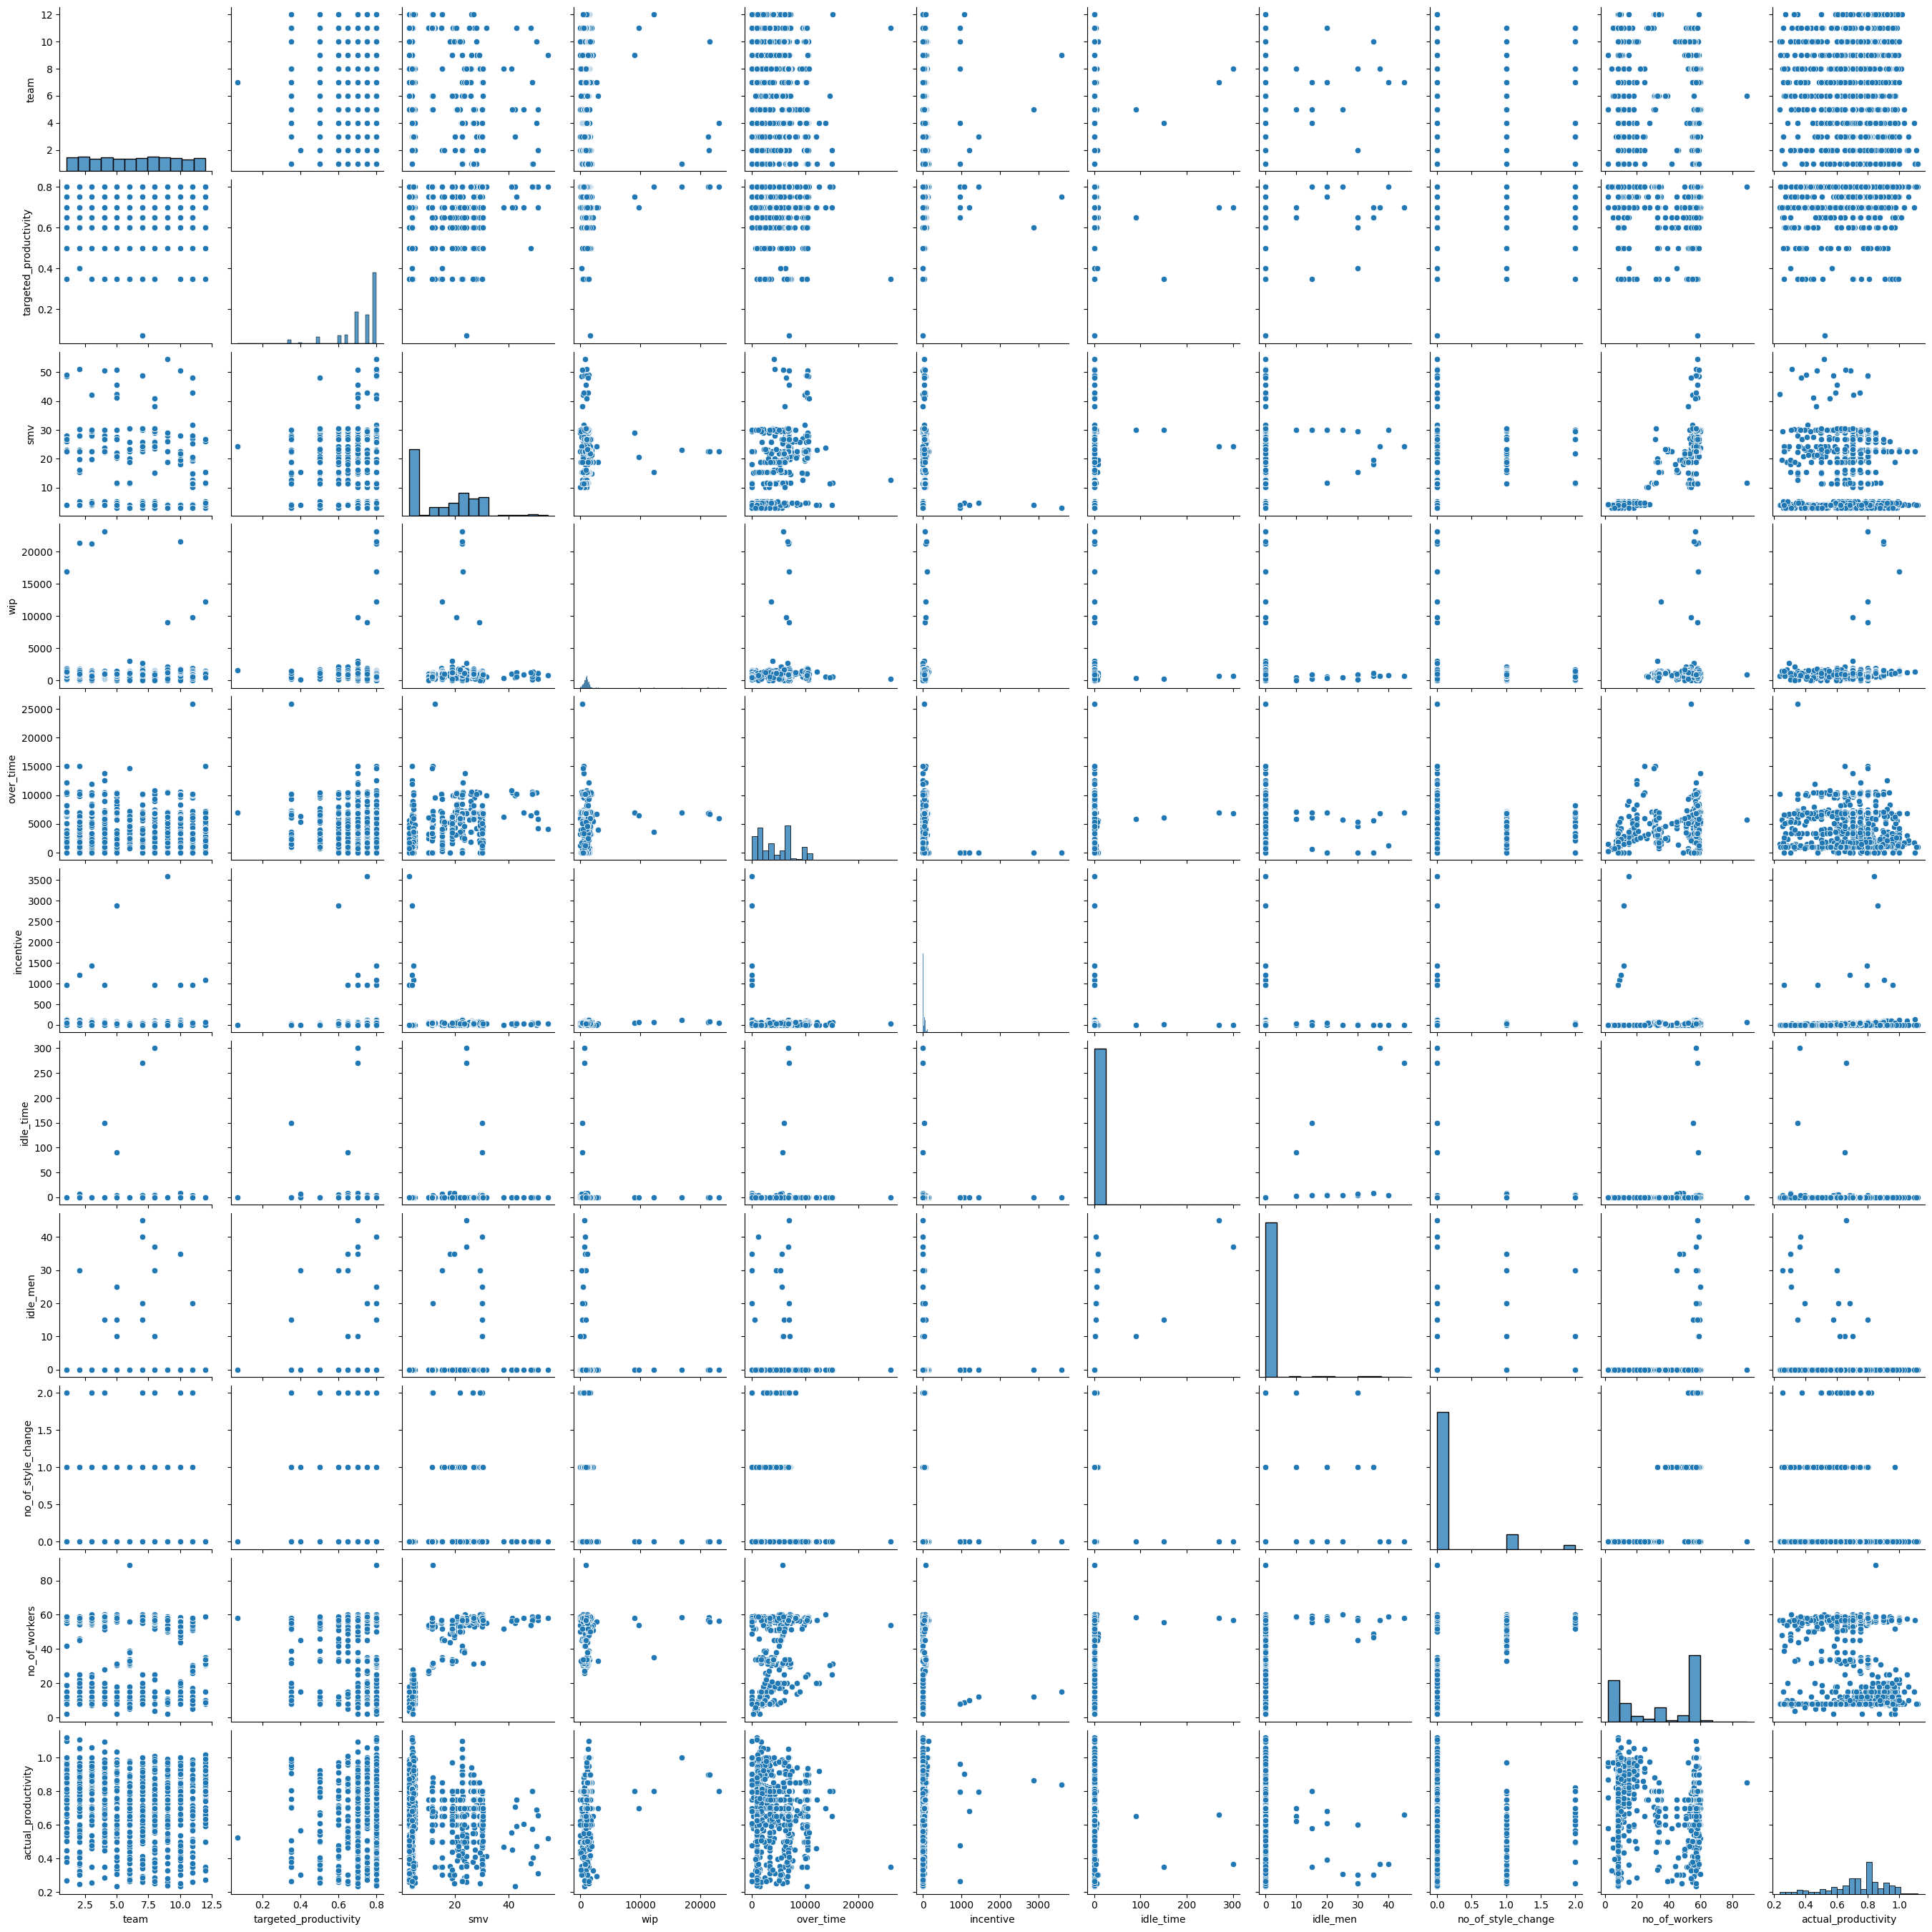

In [169]:
sns.pairplot(data)

# BoxPlot

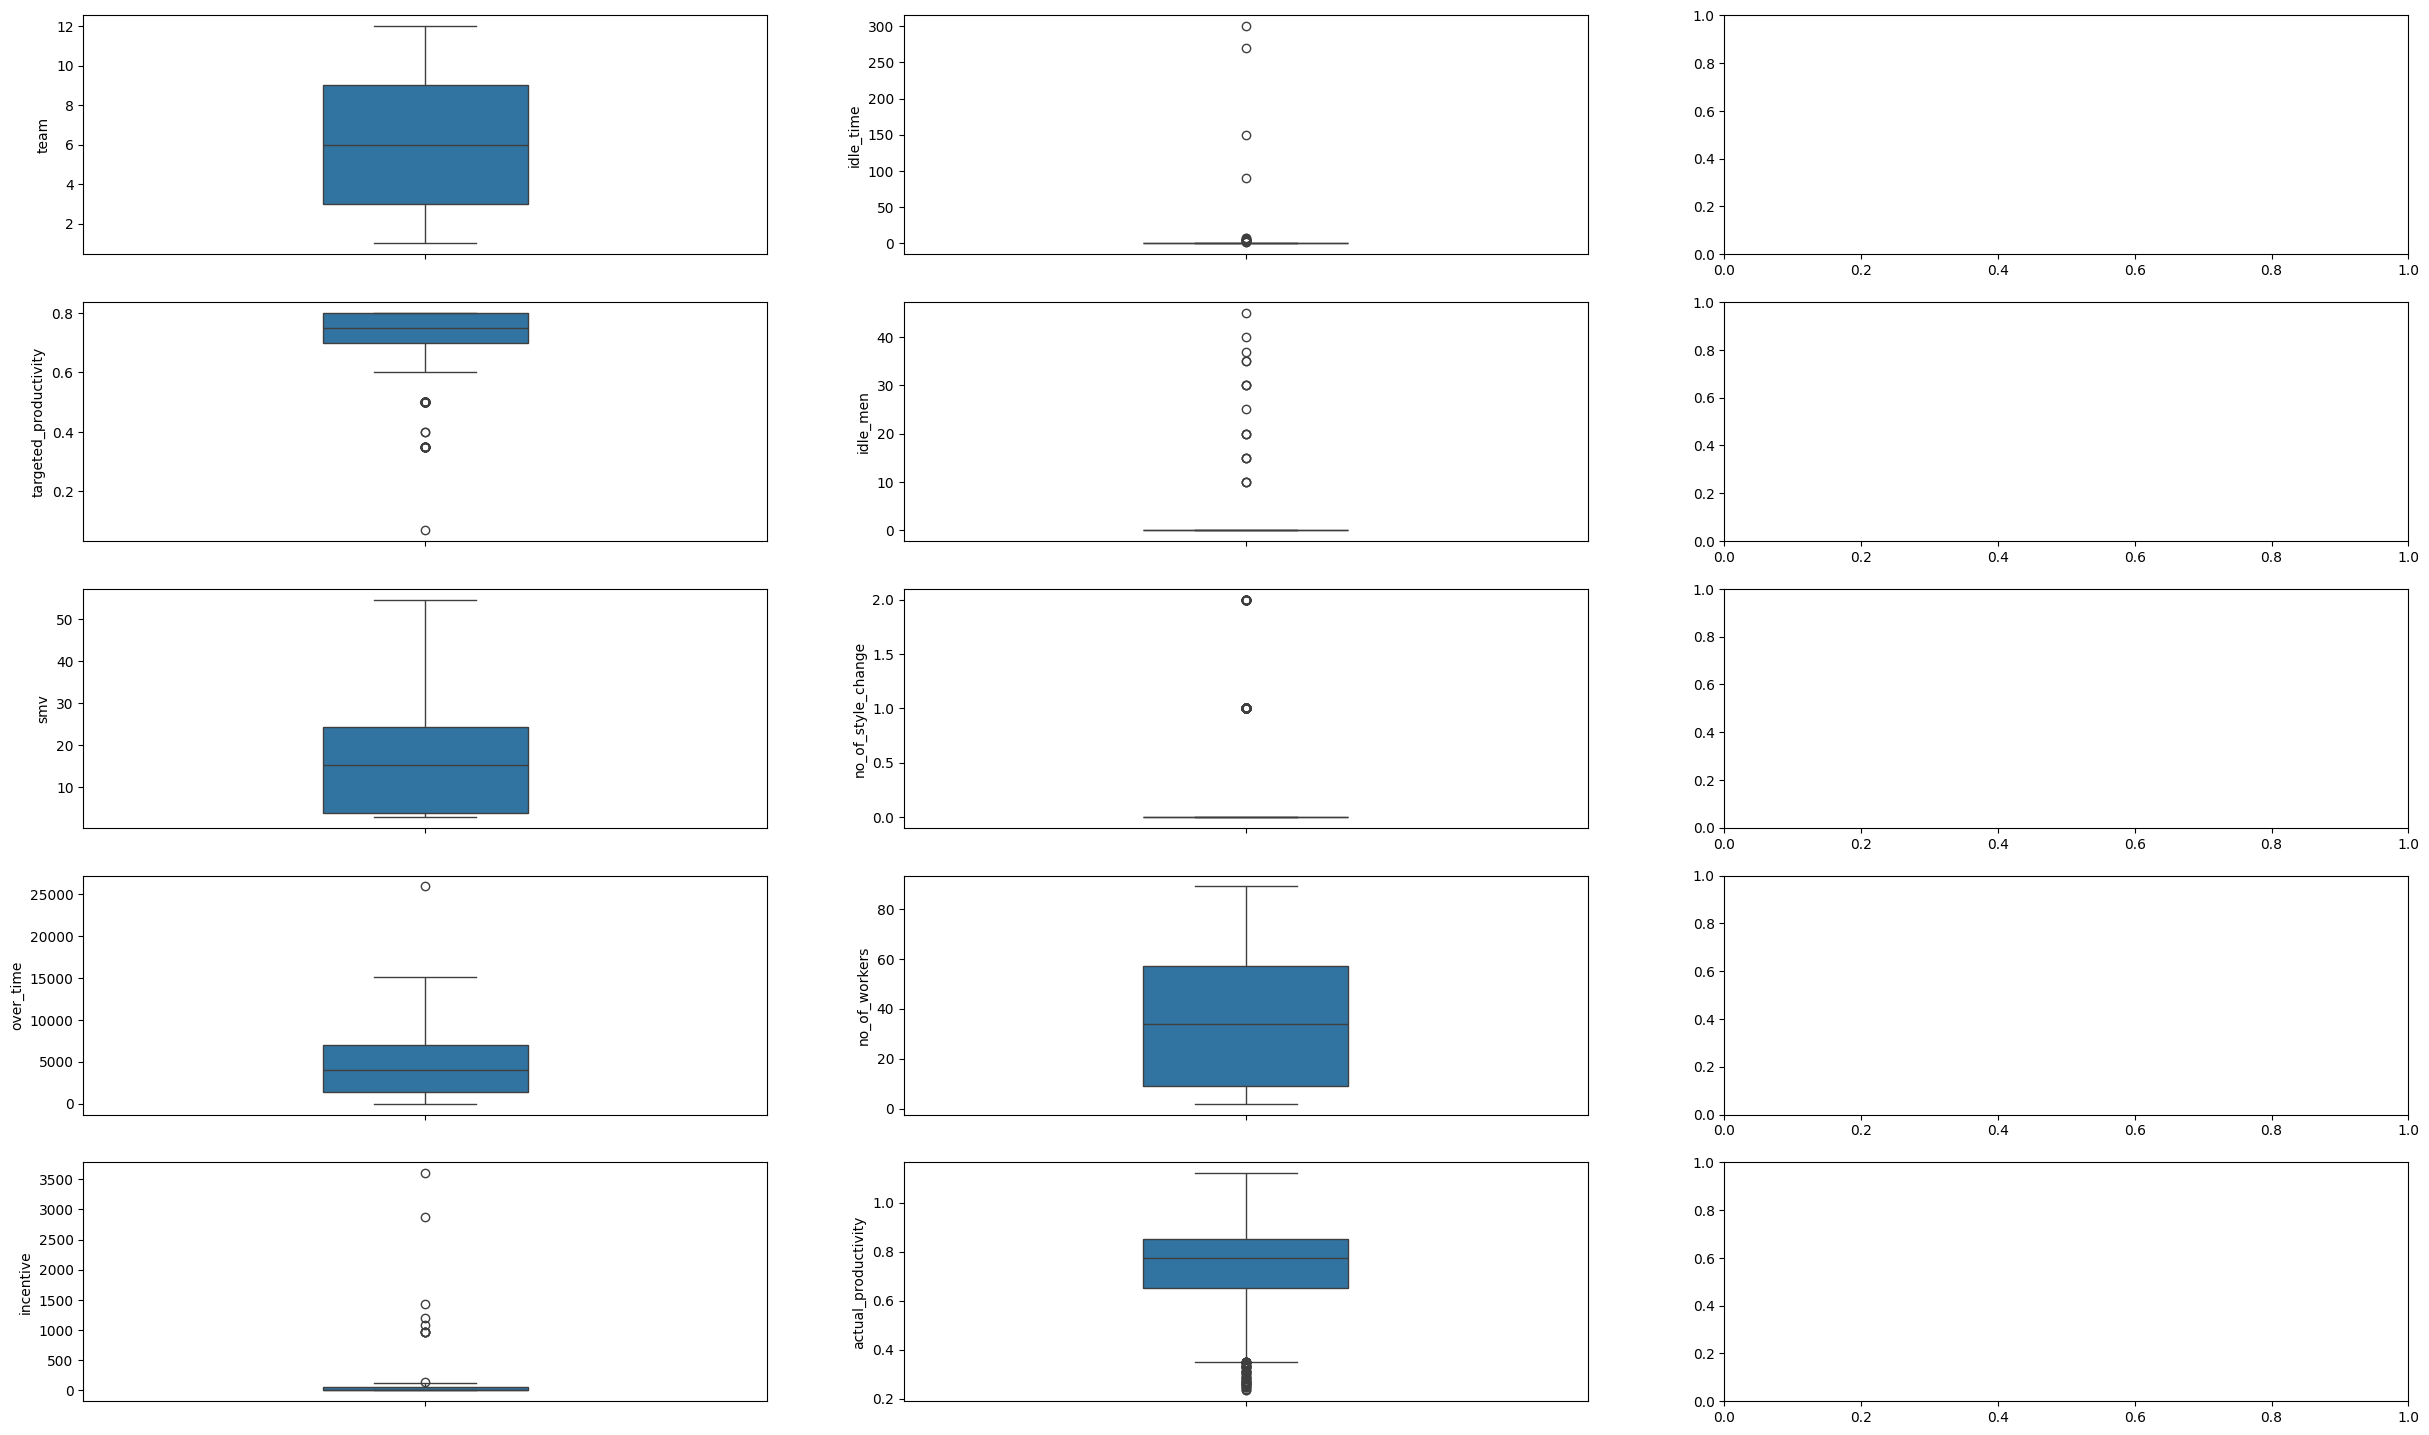

In [190]:
fig, axes = plt.subplots(5, 3, figsize=(30, 18))

for i, column in enumerate(data[num_columns].columns):
    sns.boxplot(data[column], ax = axes[i % 5][i // 5], width=0.3)

In [188]:
data["targeted_productivity"].quantile(0.25)

0.7

In [208]:
outliers = []
for column in data[num_columns].columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    outlier = data[(data[column] < Q1-1.5*IQR ) | (data[column]> Q3+1.5*IQR)]

    if not outlier.empty:
        outliers.append((column, outlier))

for outlier in outliers:
    print(outlier[0])
    print(pd.DataFrame(outlier[1]))

targeted_productivity
           date   quarter  department       day  team  targeted_productivity  \
146    1/8/2015  Quarter2      sweing  Thursday    11                   0.35   
165   1/10/2015  Quarter2      sweing  Saturday    11                   0.50   
168   1/10/2015  Quarter2      sweing  Saturday     5                   0.50   
169   1/10/2015  Quarter2  finishing   Saturday     5                   0.50   
187   1/11/2015  Quarter2  finishing     Sunday     5                   0.50   
...         ...       ...         ...       ...   ...                    ...   
1104   3/7/2015  Quarter1      sweing  Saturday     6                   0.50   
1112   3/8/2015  Quarter2   finishing    Sunday     5                   0.50   
1124   3/8/2015  Quarter2      sweing    Sunday     5                   0.50   
1147   3/9/2015  Quarter2      sweing    Monday     7                   0.50   
1171  3/10/2015  Quarter2   finishing   Tuesday     7                   0.50   

        smv     w

# Статистика для quarter

In [376]:
data.groupby("quarter").describe()

team                                                 \
          count      mean       std  min  25%  50%   75%   max   
quarter                                                          
Quarter1  360.0  6.327778  3.502217  1.0  3.0  6.0   9.0  12.0   
Quarter2  335.0  6.361194  3.479321  1.0  3.0  6.0   9.0  12.0   
Quarter3  210.0  6.642857  3.343360  1.0  4.0  7.0   9.0  12.0   
Quarter4  248.0  6.475806  3.480341  1.0  3.0  6.0  10.0  12.0   
Quarter5   44.0  6.431818  3.611337  1.0  3.0  6.0  10.0  12.0   

         targeted_productivity            ... no_of_workers        \
                         count      mean  ...           75%   max   
quarter                                   ...                       
Quarter1                 360.0  0.744083  ...          57.0  60.0   
Quarter2                 335.0  0.732090  ...          57.0  60.0   
Quarter3                 210.0  0.721190  ...          57.0  89.0   
Quarter4                 248.0  0.714516  ...          57.0  60.0   
Quarter5                  44.0  0.718182  ...          57.0  59.0   

         actual_productivity                                          \
                       count      mean       std       min       25%   
quarter                                                                
Quarter1               360.0  0.751560  0.161318  0.260979  0.699965   
Quarter2               335.0  0.743710  0.171114  0.233705  0.652280   
Quarter3               210.0  0.704759  0.175614  0.235795  0.613848   
Quarter4               248.0  0.709067  0.185983  0.259375  0.600431   
Quarter5                44.0  0.826177  0.183851  0.286985  0.750647   

                                        
               50%       75%       max  
quarter                                 
Quarter1  0.800045  0.850120  1.050667  
Quarter2  0.800035  0.850502  1.100484  
Quarter3  0.725436  0.800391  1.120437  
Quarter4  0.750411  0.814431  1.059621  
Quarter5  0.888276  0.971867  1.000457  

[5 rows x 88 columns]

# Дата

In [244]:
data["day_"] = data["date"].apply(lambda x: x.split("/")[0])
data["month"] = data["date"].apply(lambda x: x.split("/")[1])
data["year"] = data["date"].apply(lambda x: x.split("/")[2])

In [245]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_,month,year
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,2015
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,1,2015
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,3,11,2015
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,3,11,2015
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,3,11,2015
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,3,11,2015
